<div align="center">

<font size="5">

Laboratorium z przedmiotu: \
**Głębokie uczenie i analiza obrazów**

Ćwiczenie 1: \
**Regresja logistyczna i inne klasyczne algorytmy klasyfikacji**

</font>

\
Marta Szarmach \
Zakład Telekomunikacji Morskiej \
Wydział Elektryczny \
Uniwersytet Morski w Gdyni

07.2023
</div>


# 1. Wprowadzenie

**Uczenie maszynowe** jest to zbiór algorytmów, które odnajdują zależności ukryte w danych, potrafią te zależności modelować (tj. opisywać za pomocą matematycznych struktur) bez bycia jawnie zaprogramowanym przez człowieka i doskonalą swoje działanie (tj. potrafią dobierać lepsze parametry opisujące modele) dzięki dostarczeniu do nich nowych danych (uczenie maszynowe jest jedynie częścią szerszego zagadnienia, jakim jest **sztuczna inteligencja**, tj. dziedzina nauki z pogranicza informatyki, matematyki, kongwinistyki i neurologii, zajmująca się tworzeniem maszyn/oprogramowania ,,udających'' ludzką inteligencję, tj. potrafiącego analizować dostarczone doń dane, wyciągać na ich podstawie wnioski i podejmować decyzje).  Innymi słowy, w przeciwieństwie do klasycznego programowania, nie tworzy się gotowych reguł, lecz algorytm sam, na podstawie dostarczonych danych i spodziewanych odpowiedzi na nie, określa reguły, tzn. tworzy **model**, który stara się odzwierciedlić strukturę danych i sposób wyznaczania tychże odpowiedzi. Model najczęściej opisany jest za pomocą fukcji (hipotezy) zależnej od **parametrów** $\theta$, które są pewnymi wartościami liczbowymi ulegającymi zmianie w ramach treningu (nie należy mylić parametrów z **hiperparametrami**, które również opisują w pewnym sensie model, lecz nie są wyznaczane podczas treningu, a wręcz przeciwnie, muszą być podane wcześniej).

Aby stworzyć i wytrenować model, najczęściej określa się pewną funkcję (nazywaną **funkcją kosztu** $J(\theta)$), która jest w stanie policzyć, jak bardzo model myli się podczas dokonywania predykcji. **Trening** polega na optymalizacji funkcji kosztu, a dokładniej mówiąc, iteracyjnej aktualizacji parametrów modelu, aż koszt na danych treningowych staje się (najczęściej) minimalny - wówczas uważa się, że model możliwie najlepiej odzwierciedla te dane. Jedną z metod optymalizacji jest **metoda gradientu prostego**, której działanie opiera się na poszukiwaniu lokalnego minimum poprzez wyznaczanie gradientu $\frac{\partial J(\theta)}{\partial \theta}$ (kierunku najszybszej zmiany) funkcji kosztu i aktualizacji parametrów zgodnie z tym gradientem. 

\
Uczenie maszynowe można podzielić na dwie podstawowe grupy: 
* **uczenie nadzorowane**, w którym każdy rekord danych dostarczony do algorytmu posiada **etykietę** zawierającą pożądaną odpowiedź algorytmu na ten konkretny rekord. Algorytmy uczenia nadzorowanego potrafią rozwiązywać takie problemy jak:
    * **regresja** - przypisanie do rekordu danych pewnej dowolnej liczby,
    * **klasyfikacja** -  przypisanie do rekordu danych liczby (z przedziału dyskretnego), symbolizującej jego przynależność do pewnej klasy,
* **uczenie nienadzorowane** - dane nie posiadają predefiniowanych etykiet, algorytmy muszą same znaleźć strukturę w danych. Rozwiązują takie problemy, jak m.in.:
    * **grupowanie** - podział zebranych danych na grupy, tak, aby dane z jednej grupy były bardziej podobne do siebie niż do danych z innych grup,
    * **wykrywanie anomalii** - odnalezienie w zbiorze danych tych rekordów, które w pewien sposób odróżniają się od reszty.

W niniejszym ćwiczeniu zajmować się będziemy jedynie zagadnieniem klasyfikacji. Niektórymi algorytmami uczenia maszynowego realizującymi klasyfikację są:
* **Maszyna wektrów wspierających** (ang. *Support Vector Machine*, **SVM**) - algorytm, który dokonuje klasyfikacji danych poprzez utworzenie (z pomocą dodatkowych funkcji, tzw. kerneli) dodatkowego wymiaru i hiperpłaszczyzny, która oddziela na tym wymiarze dane z różnych klas z maksymalnym możliwym marginesem,
* **Drzewo decyzyjne** (ang. *Decision Tree*) - zbiór hierarchicznie następujących po sobie instrukcji warunkowych, których ostatnia warstwa decyduje o wyniku predykcji,
* *k* **najbliższych sąsiadów** (ang. *k Nearest Neighbours*, *k*-NN) - to, jaka zostanie podjęta decyzja dotycząca badanego rekordu, zależy od etykiet $k$ innych rekordów najbliższych temu rekordowi,
* a także **regresja logistyczna** - która to będzie głównym zagadnieniem niniejszego ćwiczenia. W toku działania tegoż algorytmu, dokonuje się dopasowania pewnej funkcji, wiążącej parametry $\theta$ i dane X, której zadaniem jest oszacowanie prawdopodobieństwa, z jakim określony rekord danych należy do pewnej klasy.

<div align="center">

<img src='https://miro.medium.com/v2/resize:fit:828/1*PQ8tdohapfm-YHlrRIRuOA.gif' />

<font size="1">Grafika: towardsdatascience.com</font>
</div>

# 2. Cel ćwiczenia

**Celem niniejszego ćwiczenia** jest zapoznanie się z działaniem klasycznych algorytmów uczenia maszynowego realizujących zagadnienia klasyfikacji poprzez:
* implementacji ,,od zera'' algorytmu regresji logistycznej (łącznie z optymalizacją funkcji kosztu metodą gradientu prostego),
* użycie gotowych klas z biblioteki Scikit-learn z zaimplementowanymi gotowymi klasyfikatorami (regresją logistyczną, drzewem decyzyjnym i *k*-NN) i porównanie otrzymanych wyników.


# 3. Stanowisko laboratoryjne

Do wykonania niniejszego ćwiczenia niezbędne jest stanowisko laboratoryjne, składające się z komputera klasy PC z zainstalowanym oprogramowaniem:
* językiem programowania Python (w wersji 3.8),
* IDE obsługującym pliki Jupyter Notebook (np. Visual Studio Code z rozszerzeniem ipykernel).


# 4. Przebieg ćwiczenia
## 4.1. Implementacja algorytmu regresji logistycznej ,,od zera''

### Inicjalizacja: import niezbędnych elementów

Na początku wykonaj poniższy fragment kodu, aby zaimportować biblioteki niezbędne do wykonania poniższego ćwiczenia:
* **Scikit-learn** - biblioteka zawierająca gotowe implementacje wielu algorytmów klasycznego uczenia maszynowego, a także zbiory danych czy metryki. Tutaj skorzystamy ze zbioru danych iris - `datasets.load_iris`.
* **NumPy** - biblioteka umożliwiająca wykonywanie wysoko zoptymalizowanych obliczeń matematycznych na objektach typu *numpy array* (wielowymiarowych tablic).
* **Matplotlib** - biblioteka wspomagająca wizualizację pracy czy analizę danych poprzez wyświetlanie wykresów.

In [1]:
#! python -m pip install numpy==1.22.3
#! python -m pip install scikit-learn==0.24.2
#! python -m pip install matplotlib==3.4.2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Po zaimportowaniu niezbędnych bibliotek, załadujmy gotowy zbiór danych Iris (zawierający dane o wymiarach różnych rodzajów irysów), pochodzący z repozytorium UCI (więcej informacji o tym zbiorze danych możesz uzyskać [TUTAJ](https://archive.ics.uci.edu/dataset/53/iris)). Dane zapiszmy pod zmienną X, a odpowiadające im etykiety - y.

Ponadto, dla zobrazowania danych, które będziemy używać, wyświetlmy rozmiary tablic X i y, a także 5 pierszwych rekordów/etykiet.

In [2]:
iris = load_iris()
X = iris.data[0:100,:]
y = iris.target[0:100]
print("Wymiary danych wejściowych: " + str(X.shape))
print("Przykładowe dane wejściowe: ")
print(X[0:5,:])
print("Wymiary etykiet: " + str(y.shape))
print("Przykładowe etykiety: ")
print(y[0:5])

Wymiary danych wejściowych: (100, 4)
Przykładowe dane wejściowe: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Wymiary etykiet: (100,)
Przykładowe etykiety: 
[0 0 0 0 0]


Przyjrzyjmy się wyświetlonym informacjom na temat wczytanych danych. Wczytujemy 100 rekordów o 4 cechach (wymiary tablicy X to 100x4). Etykiety zapisane są w formie 1-wymiarowego wektora y (o wymiarze 100) - z dokumentacji możemy się dowiedzieć, że mogą one przyjmować jedną z 3 wartości: 0, 1 lub 2, symbolizujących przynależność rekordu do jednej z 3 klas (każda klasa oznacza inny typ irysa), lecz w naszym przypadku, aby skupić się jedynie na zagadnieniu binarnej klasyfikacji, podczas ładowania danych odrzucamy ostatnich 50 rekordów należących do 3 klasy, więc operujemy jedynie na 2 klasach.

<font size="2">Informacje o wymiarach otrzymanych tablic będą nam bardzo potrzebne na późniejszym etapie, podczas pracy na macierzach przy implementacji procesu terningu i predykcji naszego algorytmu.</font>


### Przygotowanie danych

Aby móc w pełni korzystać z tych danych, musimy je jednak nieco przekształcić. W tym celu wykonamy dwie operacje:
* dokonamy **standaryzacji** danych, tj. przekształcimy je tak, aby bez zmiany ich struktury, każda z cech posiadała średnią o wartości 0 i wariancję o wartości 1 - poprawi to działanie algorytmów uczenia maszynowego, zwłaszcza podczas pracy nad danymi o szerokiej dynamice (różnych rzędach wielkości) czy różnych jednostkach,
* podzielimy cały dostępny zbiór danych na 2 zestawy: 
    * **treningowy** - na podstawie którego model zostanie wytrenowany (to pod te dane zostaną dopasowane parametry naszego modelu),
    * **testowy** - który posłuży nam do określenia, jak dobrze działa nasz model na danych, których wcześniej model nie widział.

<font size="2">W tym konkretnym przypadku nie będziemy jeszcze wydzielać trzeciego z zazwyczaj tworzonych zestawów danych, zestawu **walidacyjnego**, na podstawie którego dopasowuje się hiperparametry modelu zanim przejdzie się do jego właściwego uczenia - nie ma takiej potrzeby, gdyż nie będziemy w ramach tego ćwiczenia zajmować się dopasowaniem żadnych hiperparametrów.</font>

Zacznijmy od napisania funkcji `standarize_data` służącej do normalizacji danych. Zgodnie z poniższym wzorem, zaimplementuj funkcję, która przyjmuje jako argument wejściowe (tablicę X), oblicza średnią $\mu_n$ i odchylenie standardowe $\sigma_n$ każdej z cech $x_n$, a następnie odejmuje od nich wyliczone średnie i dzieli je przez odchylenia stardardowe: 
\begin{equation*}
	x_n = \frac{x_n - \mu_n}{\sigma_n}
\end{equation*}
po czym zwraca tak znormalizowane dane jako tablicę Xnorm.

<font size="2">Wskazówki przydatne przy implementacji funkcji `standarize_data`:
* Zapoznaj się z dokumentacją dwóch funkcji z biblioteki NumPy: `np.mean` ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)) oraz `np.std` ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.std.html)). Zwróć uwagę na parametr `axis`.
* Zastosuj mechanizm broadcastigu występujący podczas operacji na tablicach z użyciem NumPy (więcej o tym możesz przeczytać [TUTAJ](https://numpy.org/doc/stable/user/basics.broadcasting.html)).
</font>

In [3]:
def standarize_data(X):
    """Funkcja realizująca standaryzację danych: przyrównanie średniej każdej z cech do 0, 
    a wariancji do 1. \n
    Argument: X - nieprzekształcone dane (numpy array, shape = (num_samples, num_features) ). \n
    Zwraca: \n
    - Xnorm - znormalizowane dane (numpy array, shape = (num_samples, num_features) ), \n
    - mu - wektor ze średnimi każdej z cech (numpy array, shape = (num_features,) ), \n
    - sigma - wektor z odchyleniami standardowymi każdej z cech (numpy array, shape = (num_features,) )."""

    # ------- UZUPEŁNIJ KOD --------
    # Oblicz mu - średnią każdej z cech (pamiętaj, że cechy przechowywane są w każdej kolumnie tablicy X)
    mu = np.mean(X, axis=0)
    # Oblicz sigma - odchylenie standardowe każdej z cech
    sigma = np.std(X, axis=0)
    # Oblicz Xnorm - odejmij średnią od każdej z cech i podziel ją przez jej odchylenie standardowe 
    # (możesz to zrobić w 1 linijce kodu)
    Xnorm = np.divide(np.subtract(X, mu), sigma)
    # -------------------------------
    
    return Xnorm, mu, sigma

Teraz przejdźmy do utworzenia funkcji `split_data`, która ma za zadanie podzielić dostarczony jej zbiór danych X (i etykiety y) na zestaw treningowy i testowy, zgodnie z podanym jako argument procentem (wartość `percentage_train` odpowiadać ma procentowi, jaką częścią oryginalnego zbioru danych ma być zbiór treningowy).

<font size="2">Wskazówki przydatne przy implementacji funkcji `split_data`:
* Zapoznaj się z dokumentacją funkcji `np.random.choice` z biblioteki NumPy ([TUTAJ](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)). Zwróć uwagę na parametr `replace`.
* Zapoznaj się z trickiem na usunięcie elementów jednej listy z drugiej z wykorzystaniem różnicy zbiorów (więcej o tym możesz przeczytać [TUTAJ](https://stackoverflow.com/questions/3428536/how-do-i-subtract-one-list-from-another/)). Do utworzenia listy indeksów wszystkich rekordów danych możesz użyć funkcji `np.arange` z biblioteki NumPy ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)).
* Zapoznaj się ze sposobami na wyodrębnienie części tablicy w NumPy ([TUTAJ](https://numpy.org/doc/stable/user/basics.indexing.html)). Możesz je filtrować według elementów innej listy!
</font>

In [4]:
def split_data(X,y, percentage_train = 70.0):
    """Funkcja dzieląca losowo dane na zestaw treningowy oraz testowy w zadanej proporcji. \n
    Argumenty: \n
    - X - dane wejściowe (numpy array, shape = (num_samples, num_features) ), \n
    - y - etykiety (numpy array, shape = (num_samples,) ), \n
    - percentage_train (argument opcjonalny) - jakim procentem wejściowych danych ma być 
      zestaw treningowy (skalar, float, domyślna wartość: 70). \n
    Zwraca: \n
    - Xtrain - dane treningowe (numpy array, shape = (num_samples * percentage_train, num_features) ), \n
    - ytrain - etykiety do danych treningowych (numpy array, shape = (num_samples * percentage_train,) ), \n
    - Xtest - dane testowe (numpy array, shape = (num_samples * (100-percentage_train), num_features) ), \n
    - ytest - etykiety do danych testowych (numpy array, shape = (num_samples * (100-percentage_train),) )."""
    
    np.random.seed(100) # Dla zapanowania nad "losowością"
    num_all_datapoints =  X.shape[0] # Ilość wszystkich danych
    num_train_datapoints = int(np.round(X.shape[0]*percentage_train/100)) # Docelowa wielkość zestawu treningowego
    
    # ------- UZUPEŁNIJ KOD --------
    # Znając rozmiar danych wejściowych, wygeneruj indices_train - listę indeksów tych rekordów, 
    # które mają należeć do zestawu treningowego
    indices_train = np.random.choice(num_all_datapoints, num_train_datapoints, replace=False)
    # Wszystkie indeksy, które nie należą do indices_train, zapisz do indices_test
    indices_test = list(set(np.arange(X.shape[0])) - set(indices_train))
    # Wygeneruj zmienne z właściwie podzielonym zbiorem danych: Xtrain, ytrain, Xtest, ytest
    Xtrain = X[indices_train,:]
    ytrain = y[indices_train]
    Xtest = X[indices_test,:]
    ytest = y[indices_test]
    # ------------------------------
    
    return Xtrain, ytrain, Xtest, ytest

Pora sprawdzić, jak działają napisane przez Ciebie funkcje! Uruchom poniższy kod, aby podzielić nasz zbiór danych na zestaw treningowy (powinien domyślnie zawierać 70 elementów) i testowy (pozostałe 30 elementów). Elementy w poszczególnych cechach powinny po normalizacji oscylować wokół 0.

In [5]:
# Podział danych na część treningową i testową
Xtrain, ytrain, Xtest, ytest = split_data(X,y)
print("Wymiary danych treningowych: "+str(Xtrain.shape))
print("Wymiary danych testowych: "+str(Xtest.shape))

# Normalizacja obu zestawów danych
Xtrain_norm, _, _ = standarize_data(Xtrain) # pomijamy zwracanie mu i sigma dla danych treningowych
Xtest_norm, mu_test, sigma_test = standarize_data(Xtest)
print("Przykładowe znormalizowane dane treningowe: ")
print(Xtrain_norm[0:5,:])

Wymiary danych treningowych: (70, 4)
Wymiary danych testowych: (30, 4)
Przykładowe znormalizowane dane treningowe: 
[[-0.97023354  1.12689892 -1.11317579 -1.32513741]
 [ 0.73542816 -1.9493154   0.67340264  0.2589927 ]
 [-0.81517338  0.68743973 -0.97574668 -0.79709404]
 [-1.59047416 -1.7295858  -1.18189035 -0.9731085 ]
 [-0.81517338  0.24798054 -1.2506049  -1.14912295]]


### Trening modelu regresji logistycznej

Teraz, kiedy mamy już gotowe dane, na których możemy pracować, przejdźmy do najważniejszej rzeczy, czyli napisania funkcji, które utworzą nasz model oparty na regresji logistycznej i pozwolą mu się uczyć!

Przypomnijmy, że **hipotezą** $h_\theta(x)$ (tj. funkcją, która wiąże parametry modelu i dane wejściowe, dając w wyniku predykcje) regresji logistycznej jest: 
\begin{equation*}
    h_\theta(x) = g(\theta^Tx)
\end{equation*}
gdzie funkcja $g(z)$ jest to tzw. funkcja **sigmoid** o następującej postaci:
\begin{equation*}
    g(z) = \frac{1}{1+e^{-z}}
\end{equation*}

<div align="center">

<img src='https://miro.medium.com/v2/resize:fit:1280/1*OUOB_YF41M-O4GgZH_F2rw.png' />

<font size="1">Grafika: towardsdatascience.com</font>
</div>

Funkcja sigmoid ma kilka ciekawych właściwości, dzięki którym jest często spotykana przy rozwiązywaniu problemów klasyfikacji: jej wartości zawierają się w przedziale od 0 do 1 (dlatego można je traktować jak prawdopodobieństwo należenia danego rekordu danych do pewnej klasy i np. traktować te dane, dla których sigmoid zwrócił wartość większą niż 0,5, jako należące do tejże klasy), a także jest odwracalna i różniczkowalna, dzięki czemu da się obliczać jej gradient niezbędny w procesie uczenia modelu. Zaimplementuj zatem funkcję `sigmoid`, która zwraca wartość sigmoidu dla dowolnej *numpy array*!

<font size="2">Wskazówka przydatna przy implementacji funkcji `sigmoid`: Warto skorzystać z funkcji `np.exp` z biblioteki NumPy ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.exp.html)).

In [6]:
def sigmoid(z):
    """Funkcja obliczająca wartość sigmoidu dla zadanego argumentu z. \n
    """
    # ------- UZUPEŁNIJ KOD --------
    sigmoid = 1 / (1 + np.exp(-z))
    # ------------------------------
    return sigmoid

Sprawdź poprawność implementacji funkcji `sigmoid`. Obliczymy, co zwraca ta funkcja, gdy argumentem są same zera: skalar, wektor 1-D oraz macierz 2-D. W każdym przypadku, sigmoid powinien zwrócić stukturę o takich samych wymiarach, jak dane wejściowe, a każdy z jej elementów powinien wynosić 0,5.

In [7]:
# Testowanie poprawności implementacji sigmoidu
print("Sigmoid dla skalara: " + str(sigmoid(0)))
print("Sigmoid dla wektora: " + str(sigmoid(np.zeros((3)))))
print("Sigmoid dla macierzy: " + str(sigmoid(np.zeros((3,3)))))

Sigmoid dla skalara: 0.5
Sigmoid dla wektora: [0.5 0.5 0.5]
Sigmoid dla macierzy: [[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]


Jako funkcję kosztu $J(\theta)$ użyjemy **binarnej entropii krzyżowej** (ang. *Binary Cross Entropy*, BCE), często spotykaną przy okazji problemów klasyfikacji binarnej. Jej wartość jest tym większa, im więcej pomyłek popełni klasyfikator: przy zgodności etykiety $y^{(i)}$ i predykcji $h_\theta(x^{(i)})$, oba człony wyrażenia zerują się. Funkcja ta opisana jest wzorem:
\begin{equation*}
	J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}\log(h_\theta(x^{(i)})) - (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]	
\end{equation*}

Jak już wiesz, trening modelu opiera się na znalezieniu optymalnych parametrów $\theta$, tj. takich, przy których funkcja kosztu jest minimalna. My taką optymalizację przeprowadzimy z wykorzystaniem metody gradientu prostego, która do poprawnego działania musi znać gradient $\frac{\partial J(\theta)}{\partial \theta}$ naszej funcji kosztu. Pamiętaj, że **gradient ma taki sam wymiar, jak wektor parametrów $\theta$**, a zatem składa się z $n$ elementów. W przypadku gradientu fukcji BCE, każdy z jego $n$ elementów można obliczyć z następującego wzoru (pomijam tutaj jego wyprowadzenie):
\begin{equation*}
	\frac{\partial J(\theta)}{\partial \theta_n} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) \cdot x^{(i)}_n
\end{equation*}

Napisz zatem funkcję `compute_cost_and_gradient`, w której na podstawie danych treningowych i zadanych parametrów $\theta$, obliczysz koszt BCE i jego gradient.

<font size="2">Wskazówki przydatne przy implementacji funkcji `compute_cost_and_gradient`:
* Przy obliczaniu kosztu, będzie Ci na pewno potrzebna funkcja `np.log2` z biblioteki NumPy ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.log2.html)) oraz napisana przez Ciebie wcześniej funkcja `sigmoid`.
* Zamiast używania pętli `for` do iteracji po wszystkich $m$ elementach, możesz wykonać operacje na macierzach (z wykorzystaniem funkcji `np.dot` ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.dot.html))). Pamiętaj jednak o właściwościach mnożenia macierzy - nie każde macierze da się przemnożyć, muszą one mieć zgodne "wewnętrze" wymiary (ilość kolumn pierwszej macierzy musi być taka sama, jak ilość wierszy drugiej macierzy; wówczas w wyniku mnożenia otrzymujemy macierz o zgodnych "zewnętrznych" wymiarach, tj. o liczbie wierszy jak pierwsza macierz i liczbie kolumn jak druga macierz: [M,N]x[N,1]=[M,1]): w razie potrzeby zmień kolejność mnożonych macierzy albo dokonaj ich transpozycji z użyciem funkcji `np.transpose` ([TUTAJ](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)).
</font>


In [8]:
def compute_cost_and_gradient(X, y, theta):
    """Funkcja obliczająca koszt BCE dla regresji logistycznej. \n
    Argumenty: \n
    X - dane wejściowe (numpy array, shape = (num_samples, num_features) ), \n
    y - etykiety (numpy array, shape = (num_samples,) ), \n
    theta - zestaw parametrów (numpy array, shape = (num_features,) ). \n
    Zwraca: \n
    J - obliczony koszt (skalar, float), \n
    grad - obliczony gradient funkcji kosztu (numpy array, shape=(num_features) ). """
    
    # ------- UZUPEŁNIJ KOD --------
    # Oblicz sigmoid
    #print("X", X) # 4x100
    #print("Y", y) # 1D - 100 elements
    #print("theta", theta) 1D - 4 elements
    
    sig = sigmoid(np.dot(X, np.transpose(theta)))
    
    # Oblicz wartość funkcji kosztu
    J = (-np.dot(y, np.log2(sig))
          - np.dot((1-y), np.log2(1-sig))) / X.shape[0]
    
    # Oblicz jej gradient
    grad = np.dot(np.transpose(X), sig - y) / X.shape[0]
    # ------------------------------
    
    return J, grad

Sprawdźmy poprawność implementacji powyższej funkcji: uruchom następującą komórkę, aby wyliczyć przykładowe wartości kosztu i jego gradientu dla zerowych parametrów (kiedy wszystkie elementy $\theta$ są równe 0), liczone dla całego naszego zbioru danych. Koszt powinien wynosić 1, a gradient [-0.2325,  0.1645, -0.6995, -0.27].

In [9]:
# Testowanie poprawności implementacji funkcji kosztu
print("Przykładowy koszt i jego gradient, liczony dla zerowych parametrów: "+str(compute_cost_and_gradient(X,y,np.zeros((X.shape[1])))))

Przykładowy koszt i jego gradient, liczony dla zerowych parametrów: (1.0, array([-0.2325,  0.1645, -0.6995, -0.27  ]))


Mając wyznaczoną funkcję kosztu, możemy przejść do jej optymalizacji, czyli doboru takich wartości parametrów $\theta$, które dają najniższą wartość kosztu (tj. najlepiej odwzorowują dane treningowe). Jak już wspomniano, zrobimy to z wykorzystaniem metody gradientu prostego, według której aktualizacja parametrów odbywa się według poniższego wzoru:
\begin{equation*}
    \theta_n := \theta_n - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_n}
\end{equation*}
gdzie hiperparametr $\alpha$ (którego wartość musi być zdefiniowana zanim przejdzie się do treningu modelu), oznacza, jak bardzo gradient funkcji kosztu ma wpływ na nową, zaktualizowaną postać parametrów $\theta$

Napisz zatem funkcję `train_logistic_regression`, w której na podstawie danych treningowych, iteracyjnie liczona jest wartość funkcji kosztu i jego gradient, parametry są aktualizowane zgodnie z metodą gradientu prostego, a ponadto przy każdej itaracji wizualizowana jest nowa wartość kosztu, aby móc ocenić, czy w ramach treningu koszt rzeczywiście spada (ważne - jeśli zaobserwowalibyśmy wzrost kosztu wraz z kolejnymi  iteracjami, oznacza to, że model CORAZ GORZEJ radzi sobie z analizą danych treningowych, a zatem wcale się nie uczy!). "Szkielet" tej funkcji został już napisany, wykonanych zostanie 400 iteracji, a stała uczenia może zostać w postaci domyślnej (ustawionej na 0,01).

<font size="2">Poprawność implementacji tej funkcji sprawdzimy nieco później.</font>

In [10]:
def train_logistic_regression(X,y,alpha=0.01):
    """Funkcja realizująca optymalizację funkcji kosztu dla regresji logistycznej
    w celu wytrenowania modelu (otrzymania zestawu najlepszych parametrów, theta)
    z wykorzystaniem metody gradientu prostego. \n
    Argumenty: \n
    X - dane treningowe (numpy array, shape = (num_samples, num_features) ), \n
    y - etykiety (numpy array, shape = (num_samples,) ), \n
    alpha (opcjonalnie) - stała uczenia (skalar, float, domyślnie 0.001). \n
    Zwraca: theta - zestaw optymalnych parametrów (numpy array, shape = (num_features,) ). """
    
    # Inicjalizacja
    num_iterations = 400 # tyle razy wykonać ma się gradient descent
    theta = np.zeros((X.shape[1])) # wstępna inicjalizacja parametrów samymi zerami
    Js = np.zeros(num_iterations) # wektor przechowujący dotychczasowe wartości kosztu (do wizualizacji)
    
    # Uruchomienie metody gradientów prostych
    print("\nTrwa trening modelu... ")
    for i in range(num_iterations):
        # ------- UZUPEŁNIJ KOD --------
        # Korzystając z wcześniej napisanej funkcji, oblicz funkcję kosztu J i jej gradient grad
        J, grad = compute_cost_and_gradient(X, y, theta)
        # Zapisz obliczony koszt jako odpowiedni element w Js
        Js[i] = J
        # Dokonaj aktualizacji parametrów theta o wcześniej obliczony gradient przemnożony przez stałą uczenia
        theta = theta - alpha * grad
        # ------------------------------
    print("Zakończono. ")
    
    # Wizualizacja zmian kosztu
    plt.figure()
    plt.plot(Js)
    plt.title("Efekty treningu modelu - zmiany w koszcie")
    plt.xlabel("Numer iteracji")
    plt.ylabel("Wartość funkcji kosztu")
    plt.show(block=False)
    
    return theta

### Predykcja i poskładanie wszystkiego w całość!

Wytrenowany model musi umieć dokonywać predykcji - w tym przypadku, podejmować decyzję, czy analizowany rekord danych zaklasyfikować do klasy pierwszej (etykieta 0) czy drugiej (etykieta 1). Napisz zatem ostatnią w tej części ćwiczenia funkcję, `predict_logistic_regression`, która oblicza funkcję hipotezy dla regresji logistycznej i zwraca odpowiednie etykiety.

<font size="2">Wskazówka przydatna przy implementacji funkcji `predict_logistic_regression`: Pamiętaj, że model ma zwrócić etykietę 0 w sytuacji, kiedy prawdopodobieństwo obliczone z wykorzystaniem hipotezy jest mniejsze niż 0,5. Poszukaj funkcji z biblioteki NumPy, która realizuje przybliżanie do najbliższej liczby naturalnej!
</font>

In [11]:
def predict_logistic_regression(X, theta):
    """Funkcja obliczająca ostateczną predykcję regresji logistycznej. \n
    Argumenty: \n
    X - dane wejściowe (numpy array, shape = (num_samples, num_features) ), \n
    theta - zestaw optymalnych parametrów (numpy array, shape = (num_features,) ). \n
    Zwraca: pred - dokonane predykcje (numpy array, shape = (num_samples,) ). """
    # ------- UZUPEŁNIJ KOD --------
    pred = np.round(sigmoid(np.dot(X, np.transpose(theta))))
    # ------------------------------
    return pred

Sprawdź poprawność implementacji funkcji `predict_logistic_regression`. W poniższej komórce wykonujemu tę funkcję dla pierwszych pięciu rekordów oryginalnego zbioru danych i zerowych parametrów. Powinieneś otrzymać w wyniku same zera.

In [12]:
# Testowanie poprawności implementacji predykcji
print("Przykładowe predykcje przy zerowych parametrach: "+str(predict_logistic_regression(X[0:5,:],np.zeros((X.shape[1])))))

Przykładowe predykcje przy zerowych parametrach: [0. 0. 0. 0. 0.]


Czas uruchomić całość - od właściwego uczenia naszego modelu, aż po dokonanie przezeń predykcji na danych testowych! Uruchom poniższy kod, w którym wykorzystujemy niemal wszystko, co do tej pory udało nam się napisać. 


Trwa trening modelu... 
Zakończono. 


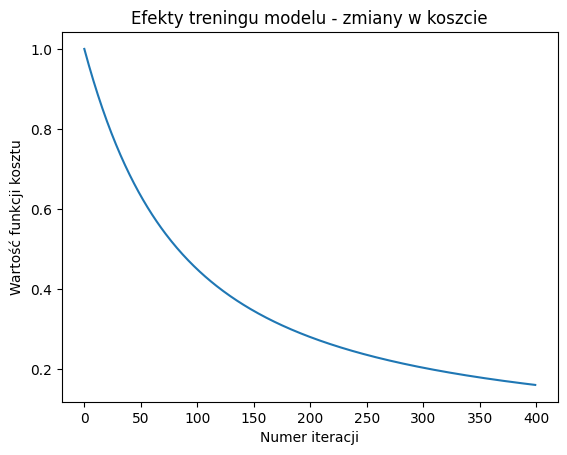

Dokładność modelu na danych testowych: 100.0%


In [13]:
# Trening modelu (na danych treningowych)
theta = train_logistic_regression(Xtrain_norm,ytrain)
# Dokonanie predykcji (na danych testowych) i obliczenie dokładności modelu
pred = predict_logistic_regression(Xtest_norm,theta)
accuracy = np.mean(pred==ytest)
print("Dokładność modelu na danych testowych: "+str(accuracy*100)+'%')

Jeśli na wykresie obserwujesz stopniowy spadek kosztu - świetnie, Twój model się uczy! Można też zaobserwować bardzo wysoką wartość dokładności (**dokładność** to procent decyzji, które model podjął właściwie) naszego modelu na danych z zestawu testowego, świadczącą o jego poprawnym działaniu. 


## 4.2. Uruchomienie klasyfikatorów z biblioteki Scikit-learn

### Import nowych niezbędnych klas

Udało Ci się stworzyć model klasyfikatora opartego o regresję logistyczną od zera. Na szczęście nie zawsze trzeba włożyć tyle pracy, aby móc używać algorytmów uczenia maszynowego. Istnieją biblioteki posiadające gotowe implementacje wielu z nich. Jedną z takich bibliotek jest wykorzystywana już przez Ciebie biblioteka Scikit-learn. Tym razem do sprawdzenia, jak z analizowanym tutaj zbiorze danych iris radzą sobie inne algorytmy, wykorzystamy jej gotowe klasy i metody:
- model regresji logistycznej - `linear_model.LogisticRegression` (dokumentacja [TUTAJ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)), 
- model drzewa decyzyjnego - `tree.DecisionTreeClassifier` ([TUTAJ](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)),
- model *k*-NN - `neighbors.KNeighborsClassifier` ([TUTAJ](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)),
- metrykę dokładności - `metrics.accuracy_score` ([TUTAJ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)),
- klasę standaryzującą dane - `preprocessing.StandardScaler` ([TUTAJ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)),
- funkcję dzielącą dane na zestaw treningowy i testowy - `model_selection.train_test_split` ([TUTAJ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

Uruchom poniższą komórkę, aby zaimportować niezbędne klasy i metody. Zapoznaj się też z ich dokumentacją.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Przygotowanie danych z użyciem gotowych metod

Mając wciąż w pamięci przechowywane zmienne X i y z oryginalnym, jeszcze nieznormalizowanym ani niepodzielonym zbiorem danych iris (oraz etykietami), możemy je ponownie wykorzystać w tej części ćwiczenia. Napisz więc fragment kodu, który:
* dzieli dane X i y na właściwe zestawy Xtrain i Xtest (użyj metody `train_test_split`) - niech zestaw treningowy zawiera 70% danych,
* standaryzuje Xtrain i Xtest (zwróć uwagę na metodę `fit_transform` klasy `StandardScaler`).

In [15]:
# ------------ UZUPEŁNIJ KOD -------------
# Podziel dane z X i y na zestaw treningowy (70%) i testowy (30%) z wykorzystaniem metody train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
# Dokonaj normalizacji danych treningowych z wykorzystaniem klasy StandardScaler - zwróć Xtrain_norm
scaler = StandardScaler()
Xtrain_norm = scaler.fit_transform(Xtrain)
# Dokonaj normalizacji danych testowych - zwróć Xtest_norm
Xtest_norm = scaler.fit_transform(Xtest)
# ----------------------------------------

print("Wymiary danych treningowych: "+str(Xtrain.shape))
print("Wymiary danych testowych: "+str(Xtest.shape))
print("Przykładowe znormalizowane dane treningowe: ")
print(Xtrain_norm[0:5,:])

Wymiary danych treningowych: (70, 4)
Wymiary danych testowych: (30, 4)
Przykładowe znormalizowane dane treningowe: 
[[ 1.0946559  -0.18510948  1.29436799  1.20552424]
 [ 0.93401458 -0.4047309   1.22380276  1.38739212]
 [-0.6723987  -1.72245943  0.37701996  0.47805272]
 [ 2.37978653  0.03451194  1.50606369  1.38739212]
 [ 0.29144927 -0.4047309   0.58871566  1.02365636]]


### Regresja logistyczna z biblioteki Scikit-learn

Mamy przygotowane dane, pora zatem wytrenować model regresji logistycznej z wykorzystaniem klasy `LogisticRegression`!
* Do trenowania (na bazie zestandaryzowanego zestawu treningowego) użyj metody `fit`.
* Do dokonania predykcji użyj metody `predict` - zobacz, jakich predykcji dokona Twój model na widok danych z zestandaryzowanego zestawu testowego (zapisz je do zmiennej o nazwie `pred`).
* Oblicz dokładność predykcji Twojego modelu (dla zestandaryzowanych danych testowych) z wykorzystaniem metody `accuracy_score`. Wynik zapisz do zmiennej o nazwie `acccuracy`.

In [16]:
model = LogisticRegression() # zostawmy domyślne ustawienia
# ------------ UZUPEŁNIJ KOD -------------
# Wytrenuj model regresji logistycznej na zestandaryzowanych danych treningowych
model.fit(Xtrain_norm, ytrain)
# Zwróć predykcję modelu (do zmiennej o nazwie pred) dla  zestandaryzowanych danych testowych
pred = model.predict(Xtest_norm)
# Oblicz dokładność predykcji
accuracy = accuracy_score(ytest, pred)
# ----------------------------------------
print("Dokładność modelu na danych testowych: "+str(accuracy*100)+'%')

Dokładność modelu na danych testowych: 100.0%


In [17]:
# Drzewo decyzyjne
model2 = DecisionTreeClassifier(max_depth=5)
model2.fit(Xtrain_norm,ytrain)
pred = model2.predict(Xtest_norm)
accuracy = accuracy_score(ytest,pred)
print("Dokładność drzewa decyzyjnego na danych testowych: "+str(accuracy*100)+'%')

# k-NN
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(Xtrain_norm,ytrain)
pred = model3.predict(Xtest_norm)
accuracy = accuracy_score(ytest,pred)
print("Dokładność k-NN na danych testowych: "+str(accuracy*100)+'%')

Dokładność drzewa decyzyjnego na danych testowych: 100.0%
Dokładność k-NN na danych testowych: 100.0%


C:\Users\Krzysiu\anaconda3\envs\ai_3_8\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Inne klasyfikatory dostępne w Scikit-learn

Na sam koniec, sprawdź, jak zachowują się inne modele klasyfikatorów, dostępne w ramach biblioteki Scikit-learn: drzewo decyzyjne oraz *k*-NN! Uruchom po prostu poniższy kod:

Gratulacje! W ten sposób zakończyliśmy to ćwiczenie, w którym skupiliśmy się na działaniu klasycznych algorytmów klasyfikacji.


## 5. Pytania kontrolne

1. Czym różni się uczenie nadzorowane od nienadzorowanego?
2. Jakie są różnice pomiędzy problemem regresji a klasyfikacji?
3. Opisz krótko, na czym polega trening modelu uczenia maszynowego z wykorzystaniem metody gradientów prostych.

1. **Uczenie nadzorowane** - do każdego rekordu dostarczamy etykietę (odpowiedź, czyli dane wyjściowe). Tutaj celem jest nauczenie modelu przewidywania wyjść na podstawie nowych danych wejściowych. Rozwiązuje problemy regresji i klasyfikacji.
   **Uczenie nienadzorowane** - do danych nie dostarczamy etykiet, algorytm sam ma znaleźć odpowiedź. Model ma odnaleźć nowe wzorce, struktury, odpowiedzi. Rozwiązuje problemy grupowania, redukcji wymiarów, asocjacje.
2. **regresja** - przewidywanie wartości liczbowej. Wynik jest punktem na osi liczbowej. Równanie matematyczne.
   **klasyfikacja** - przyporządkowanie rekordu do danej grupy, symbolizuje przynależność do jakieś klasy. Może być binarna (0, 1), wieloklasowa, wieloetykietowa.
3. - głównym celem jest optymalizacja funkcji kosztu
   - polega na wyznaczenia gradientu funkcji kosztu -> najpierw liczmy funkcję kosztu a potem gradient z tej funkcji
    - ten gradient mówi o kierunku najszybszej zmiany wartości tej funkcji.
    - następnie można korygować parametry (jak mocno określa learning rate)
    - aktualizację parametrów robimy iteracyjnie, aż będzie znikoma zmiana parametrów.
    Warianty metody gradientu prostego:
      - podstawowa - gradient liczony na podstawie całego zestawu danych
      - stochastyczna - gradient liczony przy każdej iteracji na podstawie losowej próbki
      - batch - coś pomiędzy podstawowe a stochastycznej, gradient liczony przy danej iteracji na podstawie części zestawu danych 